# __Project: Forecasting Website Actions__

---

> __Objective:__ The objective of this project is to develop a time series forecasting model that accurately predicts website floodlight actions. This involves utilizing input variables such as monthly dates, channel-specific spends, and retail product sales to optimize marketing strategies and enhance website performance. The aim is to improve decision-making processes and maximize the effectiveness of digital marketing efforts.
>
> __Contributed By:__ © [2023] [Khalid]
All Rights Reserved

---
## Key Features
---
> This dataset encompasses channel-specific spending, retail product sales, and website floodlight actions. Leveraging time series modeling, we aim to forecast these actions using monthly date, sales, and channel-specific spend data. This analysis enables data-driven insights for optimizing website performance and marketing strategies.
>
> - Utilizes time series modeling techniques for forecasting website floodlight actions.
> - Incorporates channel-specific spends and retail product sales as input variables.
> - Employs statistical tests like ADF and KPSS for data stationarity assessment.
> - Conducts seasonal decomposition analysis to identify underlying patterns.
> - Empowers data-driven decisions for optimizing marketing strategies and website performance.

---
## Key Steps
---

### __Step 1: Load the Modules__
> In this step, we import the libraries that will be used throughout the project. These libraries include pandas for data manipulation, matplotlib for plotting, and various modules from statsmodels for time series analysis.

In [23]:
import pandas as pd
from pmdarima import auto_arima
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
import warnings

### __Step 2: Load Data__
> This step involves loading your dataset. In this project, the data is loaded from a CSV file named synthetic_data.csv. The dataset is parsed to interpret the 'Date' column as dates and set it as the index.

In [24]:
import pandas as pd

# Load the synthetic dataset
def load_data():
    # Load the synthetic data from a CSV file with the date column parsed
    data = pd.read_csv('synthetic_data.csv', parse_dates=['Date'], index_col='Date')
    return data

# Load the data
df = load_data()

# Display the first few rows of the data
df.head()


,Sales,TV Spends,Radio Spends,Search Spends,Display Spends,Video Spends,Spotify Spends,Add to Cart,Checkout,Landing Page
Date,,,,,,,,,,
2018-01-31,784,3076,669,2699,1007,1346,2300,46,52,57
2018-02-28,659,1802,1972,2704,1898,2497,4998,47,44,43
2018-03-31,729,3176,1619,2152,1872,1421,1970,49,42,43
2018-04-30,292,3176,1721,1407,1649,3588,2808,55,59,55
2018-05-31,935,2956,756,2234,2265,1709,4848,50,43,58


### __Step 3: Exploratory Data Analysis__
> This is an optional step where you can explore the loaded dataset. Functions like data.head() and data.info() can be used to display the first few rows of the data and get an overview of its structure.

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 59 entries, 2018-01-31 to 2022-11-30
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Sales           59 non-null     int64
 1   TV Spends       59 non-null     int64
 2   Radio Spends    59 non-null     int64
 3   Search Spends   59 non-null     int64
 4   Display Spends  59 non-null     int64
 5   Video Spends    59 non-null     int64
 6   Spotify Spends  59 non-null     int64
 7   Add to Cart     59 non-null     int64
 8   Checkout        59 non-null     int64
 9   Landing Page    59 non-null     int64
dtypes: int64(10)
memory usage: 5.1 KB


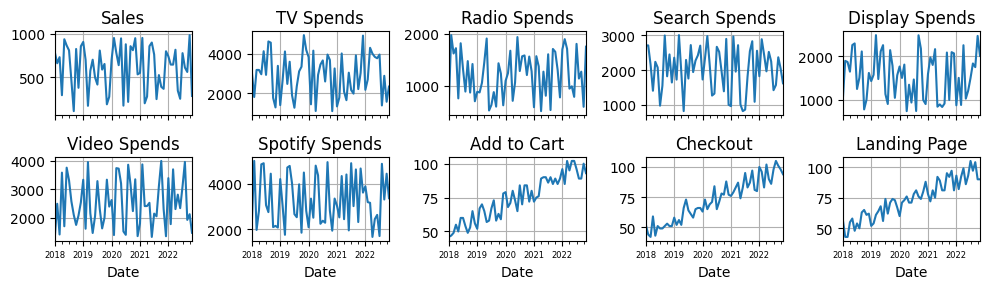

In [26]:
# Define the subplots layout as a 12x12 grid
num_rows = 2  # Adjust as needed
num_cols = 5 # Adjust as needed

# Plot the Time Series Data with a 12x12 grid layout
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 3), sharex=True)
axes = axes.flatten()

# Select the columns to plot
columns_to_plot = ['Sales',	'TV Spends',	'Radio Spends',	'Search Spends',	'Display Spends',	'Video Spends',	'Spotify Spends',	'Add to Cart',	'Checkout',	'Landing Page']

# Plot each column in a separate subplot
for i, col in enumerate(columns_to_plot):
    df[col].plot(ax=axes[i])
    axes[i].set_title(col)
    axes[i].grid(True)
    axes[i].tick_params(axis='x', labelsize=6)  # Set x-axis font size

# Adjust layout spacing
plt.tight_layout()

# Show the plot
plt.show()


### __Step 4: Seasonal Decomposition__
> In this step, the time series data is decomposed into its constituent components: trend, seasonal, and residual. This decomposition helps identify underlying patterns and trends in the data.

In [27]:
# Apply stationarity tests to a specific action's data
action_data = df['Add to Cart']  # Replace with desired action

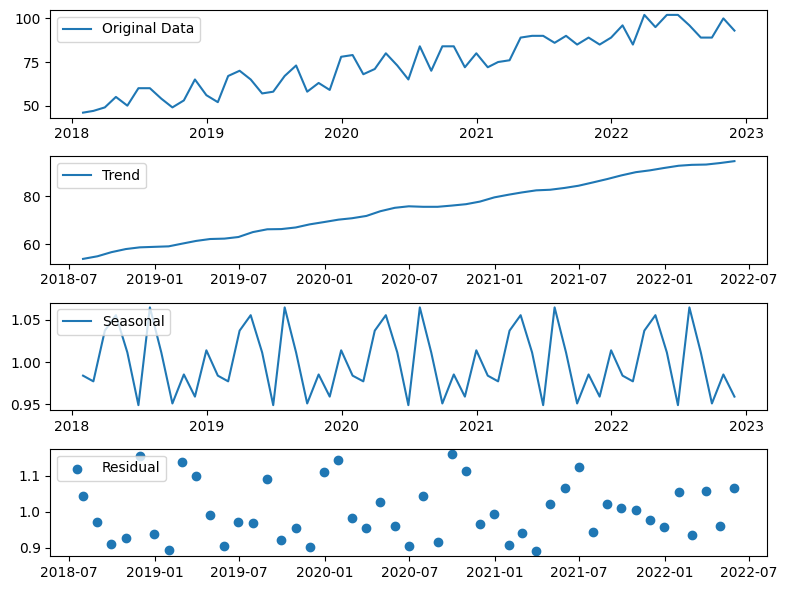

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Seasonal decomposition
def decompose_time_series(data):
    decomposition = seasonal_decompose(data, model='multiplicative', period=12)
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
    
    # Plot the decomposition
    plt.figure(figsize=(8, 6))
    plt.subplot(411)
    plt.plot(data, label='Original Data')
    plt.legend(loc='upper left')
    plt.subplot(412)
    plt.plot(trend, label='Trend')
    plt.legend(loc='upper left')
    plt.subplot(413)
    plt.plot(seasonal, label='Seasonal')
    plt.legend(loc='upper left')
    plt.subplot(414)
    plt.scatter(data.index, residual, label='Residual')
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

# Decompose 'Add to Cart' data
decompose_time_series(action_data)


### __Step 5: Stationarity Tests__
> Stationarity is a key assumption in time series modeling.
> - This step involves applying two different statistical tests, the Augmented Dickey-Fuller Test (adf_test) and KPSS Test (kpss_test), to check if the data is stationary.
> - The results of these tests provide insights into the stationarity of the time series.

In [29]:
# Stationarity tests
from statsmodels.tsa.stattools import adfuller, kpss

# Check stationarity using Augmented Dickey-Fuller Test
def adf_test(data):
    result = adfuller(data)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'Critical Values: {result[4]}')

# Check stationarity using KPSS Test
def kpss_test(data):
    result = kpss(data)
    print(f'KPSS Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'Critical Values: {result[3]}')


adf_test(action_data)
kpss_test(action_data)


ADF Statistic: -0.5692163236507982
p-value: 0.8777872755477413
Critical Values: {'1%': -3.568485864, '5%': -2.92135992, '10%': -2.5986616}
KPSS Statistic: 1.2547891491557346
p-value: 0.01
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


In [30]:
from statsmodels.tsa.stattools import adfuller

# Check for stationarity
def check_stationarity(data):
    result = adfuller(data)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])
    
    if result[1] <= 0.05:
        print("\nExplanation:")
        print("- The p-value is less than or equal to 0.05, indicating strong evidence against the null hypothesis.")
        print("- We reject the null hypothesis, which suggests that the data is stationary.")
        print("\nSuggested Action:")
        print("- Proceed with time series modeling using the stationary data.")
        diff_level = 0
        return True, diff_level
    else:
        print("\nExplanation:")
        print("- The p-value is greater than 0.05, suggesting that we fail to reject the null hypothesis.")
        print("- This implies that the data may not be stationary.")
        print("\nSuggested Action:")
        print("- Differencing may be needed to address non-stationarity before proceeding with modeling.")
        diff_level = 1
        return False, diff_level

# Check stationarity for 'Add to Cart' data
d, diff_level = check_stationarity(action_data)
print(f"="*50)
print(f"diff_level: {diff_level}")

ADF Statistic: -0.5692163236507982
p-value: 0.8777872755477413
Critical Values: {'1%': -3.568485864, '5%': -2.92135992, '10%': -2.5986616}

Explanation:
- The p-value is greater than 0.05, suggesting that we fail to reject the null hypothesis.
- This implies that the data may not be stationary.

Suggested Action:
- Differencing may be needed to address non-stationarity before proceeding with modeling.
diff_level: 1


### __Step 6: Differencing for Stationarity__
> Differencing is a technique used to stabilize the mean of a time series. The apply_differencing function applies differencing to the data, while determine_differencing assesses whether differencing is needed based on the results of stationarity tests.


In [31]:
def apply_differencing(data, diff_level):
    """
    Apply differencing to make the data more stationary.

    Parameters:
        data (pd.Series): The time series data.
        order (int): The order of differencing (default is 1).

    Returns:
        differenced_data (pd.Series): The differenced time series data.
    """
    differenced_data = data.diff(periods=diff_level).dropna()
    return differenced_data, diff_level

In [32]:
def determine_differencing(data, diff_level):
    adf_result = adfuller(data)
    kpss_result = kpss(data)
    
    if adf_result[1] > 0.05 and kpss_result[1] < 0.05:
        # Data is non-stationary according to ADF but stationary according to KPSS
        print(f"\nExplanation:")
        print(f"- The Augmented Dickey-Fuller Test (ADF) suggests that the data is non-stationary, while the KPSS test indicates stationarity.")
        print(f"- This suggests that the data may require differencing to achieve stationarity.")
        print(f"\nSuggested Action:")
        print(f"- Apply differencing to stabilize the mean of the time series data.")
        
        data_diff, diff_level = apply_differencing(data, diff_level)

        print(f"\nDifferencing applied of order value {diff_level}. Proceed to modeling!")

        return data_diff, diff_level
        
    else:
        
        print("\nExplanation:")
        print("- The data is either stationary or non-stationary according to both tests. Differencing may not be necessary.")
        print("\nSuggested Action:")
        print("- Proceed with modeling without differencing.")

        return data, diff_level

# Apply differencing analysis
#determine_differencing(action_data)


In [33]:
if diff_level == 0:
    action_data, diff_level = determine_differencing(action_data, diff_level)
    print(f"="*50)
    print(f"Data used is non-differenced (actual scale) data")
else:
    action_data_diff, diff_level = determine_differencing(action_data, diff_level)
    print(f"="*50)
    print(f"Data used is Differenced data.")


Explanation:
- The Augmented Dickey-Fuller Test (ADF) suggests that the data is non-stationary, while the KPSS test indicates stationarity.
- This suggests that the data may require differencing to achieve stationarity.

Suggested Action:
- Apply differencing to stabilize the mean of the time series data.

Differencing applied of order value 1. Proceed to modeling!
Data used is Differenced data.


### __Step 7: ARIMA or SARIMA Model Selection__
> The Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots are generated to help choose between ARIMA (AutoRegressive Integrated Moving Average) and SARIMA (Seasonal ARIMA) models. The number of significant lags and cutoffs in these plots provide insights into the appropriate model choice.

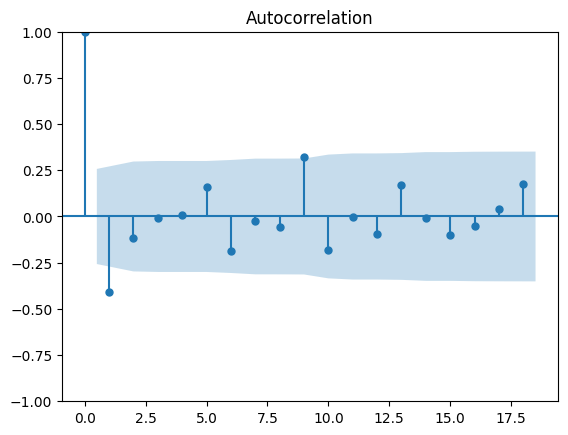

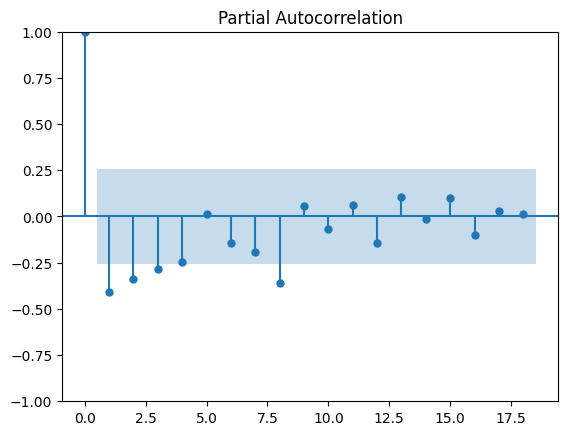


Explanation:
- The ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) plots have been generated to help in choosing ARIMA/SARIMA parameters.
- Based on the observed patterns, consider the following:
  - If significant lags are present in the ACF plot and a cutoff is observed in the PACF plot, consider an ARIMA model.
  - If significant lags and cutoffs are observed in both ACF and PACF plots, consider a SARIMA model.

Suggested Action:
- Proceed with fitting an ARIMA or SARIMA model based on the observed patterns in the ACF and PACF plots.
Data used is differenced data


In [34]:
# Select ARIMA or SARIMA Model
def select_arima_or_sarima(data):
    # Based on the ACF and PACF plots, analyze for significant lags and cutoffs
    plot_acf(data)
    plot_pacf(data)
    plt.show()
    
    print("\nExplanation:")
    print("- The ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) plots have been generated to help in choosing ARIMA/SARIMA parameters.")
    
    # Determine if significant patterns were observed
    acf_values = acf(data, nlags=20, fft=False)
    pacf_values = pacf(data, nlags=20)
    
    acf_significant_lags = len([val for val in acf_values if val > 0.1])  # Example threshold for significant lags
    pacf_cutoff = any(pacf_values[1:] < 0.1)  # Example threshold for cutoff
    
    pattern_observed = acf_significant_lags > 2 and pacf_cutoff
    
    if pattern_observed:
        print("- Based on the observed patterns, consider the following:")
        print("  - If significant lags are present in the ACF plot and a cutoff is observed in the PACF plot, consider an ARIMA model.")
        print("  - If significant lags and cutoffs are observed in both ACF and PACF plots, consider a SARIMA model.")
        print("\nSuggested Action:")
        print("- Proceed with fitting an ARIMA or SARIMA model based on the observed patterns in the ACF and PACF plots.")
    else:
        print("- No clear patterns were observed in the ACF and PACF plots. Further analysis may be needed to determine the appropriate model.")


if diff_level == 0:
    # Apply ARIMA/SARIMA model selection analysis
    select_arima_or_sarima(action_data)
    print(f"Data used is non-differenced (actual scale) data")
else:
    # Apply ARIMA/SARIMA model selection analysis
    select_arima_or_sarima(action_data_diff)
    print(f"Data used is differenced data")
    


### __Step 8: Hyperparameter Tuning with Grid Search__
> Grid search is performed to find the best parameters for the ARIMA or SARIMA model. The grid_search_arima function uses an automated approach to explore various combinations of model parameters and selects the optimal configuration.

In [35]:
warnings.filterwarnings("ignore")

# Hyperparameter Tuning with Grid Search
def grid_search_arima(data):
    stepwise_fit = auto_arima(data, seasonal=True, m=12, stepwise=True, trace=True, suppress_warnings=True)
    print(stepwise_fit.summary())
    print("\nExplanation:")
    print(f"- The best ARIMA/SARIMA parameters have been obtained through grid search:\n  - Order (p, d, q): {stepwise_fit.order}\n  - Seasonal Order (P, D, Q, s): {stepwise_fit.seasonal_order}")
    print("\nSuggested Action:")
    print("- Use these optimized parameters for fitting the final ARIMA or SARIMA model.")
    return stepwise_fit

# Apply hyperparameter tuning
grid_search_results = grid_search_arima(action_data)

# Assuming you have already performed a grid search and obtained the best parameters
best_params = grid_search_results.get_params()
p, d, q = best_params['order']
P, D, Q, s = best_params['seasonal_order']

order = (p, d, q)
seasonal_order = (P, D, Q, s)
# Assuming seasonal period is 12 (for monthly data)
seasonal_period = 12


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=413.577, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=406.794, Time=0.06 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=412.132, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=404.951, Time=0.02 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=406.788, Time=0.04 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=400.148, Time=0.03 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=401.537, Time=0.07 sec
 ARIMA(2,1,0)(0,0,1)[12] intercept   : AIC=401.424, Time=0.04 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=402.995, Time=0.14 sec
 ARIMA(3,1,0)(0,0,0)[12] intercept   : AIC=397.499, Time=0.04 sec
 ARIMA(3,1,0)(1,0,0)[12] intercept   : AIC=399.156, Time=0.07 sec
 ARIMA(3,1,0)(0,0,1)[12] intercept   : AIC=39

Step 9: Fitting the Model
The selected ARIMA or SARIMA model is fitted to the data using the fit_arima_or_sarima function. The model is trained to capture the underlying patterns and relationships in the time series.

### __Step 9: Fitting the Model__
> The selected ARIMA or SARIMA model is fitted to the data using the fit_arima_or_sarima function. The model is trained to capture the underlying patterns and relationships in the time series.

In [36]:
import statsmodels.api as sm

def fit_arima_or_sarima(data, d, seasonal_period, order, seasonal_order):
    """
    Fit an ARIMA or SARIMA model to the data.

    Parameters:
        data (pd.Series): The time series data to be modeled.
        d (int): The differencing order.
        seasonal_period (int): The seasonal period.
        p (int): The autoregressive order.
        q (int): The moving average order.
        P (int): The seasonal autoregressive order.
        Q (int): The seasonal moving average order.

    Returns:
        fit_model: The fitted ARIMA or SARIMA model.
    """

    p, d, q = order
    P, D, Q, s = seasonal_order

    if P == 0 and Q == 0:
        # Fit ARIMA model
        model = sm.tsa.ARIMA(data, order=(p, d, q))
    else:
        # Fit SARIMA model
        seasonal_order = (P, 0, Q, seasonal_period)
        model = sm.tsa.SARIMAX(data, order=(p, d, q), seasonal_order=seasonal_order)

    fit_model = model.fit()

    return fit_model


In [37]:
if d == 0:
    
    # Fit the model
    fit_model = fit_arima_or_sarima(action_data, d, seasonal_period, order, seasonal_order)

else:
      # Fit the model
    fit_model = fit_arima_or_sarima(action_data_diff, d, seasonal_period, order, seasonal_order)

### __Step 10: Forecasting__
> Using the fitted model, future values of the time series are forecasted. The forecast_arima_or_sarima function returns the forecasted values along with lower and upper confidence intervals.

In [38]:
# Step 9: Forecasting
def forecast_arima_or_sarima(fit_model, steps, d, orig_data):
    """
    Forecast future values using the fitted ARIMA or SARIMA model.

    Parameters:
        fit_model: The fitted ARIMA or SARIMA model.
        steps (int): The number of future periods to forecast.

    Returns:
        forecast_values: Forecasted values.
        lower_conf: Lower confidence interval.
        upper_conf: Upper confidence interval.
    """
    # Step 1: Forecasting on Data (could be a differenced data too depending upon the stationarity)
    forecast = fit_model.get_forecast(steps=steps)
    forecast_predicted_mean = forecast.predicted_mean
    conf_int = forecast.conf_int()
    lower_conf = conf_int.iloc[:, 0]
    upper_conf = conf_int.iloc[:, 1]

    if d == 0:
        return forecast_predicted_mean, lower_conf, upper_conf
        
    elif d > 0:

        forecast_values_original = orig_data.iloc[-1] + forecast_predicted_mean.cumsum()
        lower_conf_original = orig_data.iloc[-1] + lower_conf.cumsum()
        upper_conf_original = orig_data.iloc[-1] + upper_conf.cumsum()

        confidence_intervals_df = pd.DataFrame({
            'Lower CI': lower_conf_original,
            'Upper CI': upper_conf_original
        })

        # 'forecast_values_original' now contains the forecasted values in the original scale
        return forecast_values_original, lower_conf_original, upper_conf_original


In [39]:
# Apply forecasting for the next 3 periods
steps = 5  # Forecast for the next 3 periods

forecast_values, lower_conf, upper_conf = forecast_arima_or_sarima(fit_model, steps, d, action_data)


| Date       | Forecasted Values | Lower Confidence Interval | Upper Confidence Interval |
|------------|-------------------|--------------------------|--------------------------|
| 2022-12-31 | 89.607951         | 74.048782                | 105.167119               |
| 2023-01-31 | 90.147928         | 58.583549                | 121.712307               |
| 2023-02-28 | 92.283971         | 44.615853                | 139.952089               |
| 2023-03-31 | 92.933066         | 28.646357                | 157.219775               |
| 2023-04-30 | 88.406404         | 6.913038                 | 169.899770               |


### __Step 11: Visualizing the Forecast__
> The forecasted values, along with confidence intervals, are plotted using the plot_forecast_with_ci function. This plot provides a visual representation of the forecasted values compared to the actual data, with confidence intervals indicating the range of uncertainty.

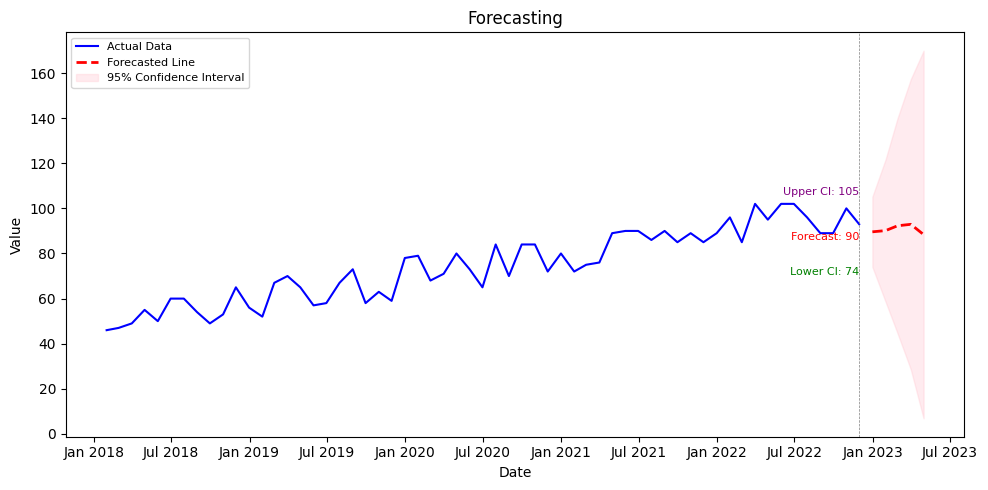

In [40]:
import matplotlib.dates as mdates

def plot_forecast_with_ci(data, forecast_values, lower_conf, upper_conf):
    """
    Plot the forecasted values along with actual values, confidence intervals, and forecasted trend line.

    Parameters:
        data (pd.Series): The original time series data.
        forecast_values (pd.Series): Forecasted values.
        lower_conf (pd.Series): Lower confidence interval.
        upper_conf (pd.Series): Upper confidence interval.
    """
    plt.figure(figsize=(10, 5))
    plt.plot(data.index, data, label='Actual Data', color='blue')
    #plt.plot(data.index[-1:].append(forecast_values.index[:1]), [data.iloc[-1]] + [forecast_values.iloc[0]], color='red', linewidth=2, linestyle='--', label='Forecasted Line')
    plt.plot(forecast_values.index, forecast_values, color='red', linewidth=2, linestyle='--', label='Forecasted Line')
    plt.fill_between(forecast_values.index, lower_conf, upper_conf, color='pink', alpha=0.3, label='95% Confidence Interval')
    
    # Print forecasted value and confidence intervals for the first period
    plt.text(data.index[-1], forecast_values.iloc[0], f'Forecast: {forecast_values.iloc[0]:.0f}', color='red', fontsize=8, va='top', ha='right')
    plt.text(data.index[-1], lower_conf.iloc[0], f'Lower CI: {lower_conf.iloc[0]:.0f}', color='green', fontsize=8, va='top', ha='right')
    plt.text(data.index[-1], upper_conf.iloc[0], f'Upper CI: {upper_conf.iloc[0]:.0f}', color='purple', fontsize=8, va='bottom', ha='right')

   
    # Add light gray dotted line to distinguish between actual and forecasted regions
    plt.axvline(data.index[-1], color='gray', linestyle='--', linewidth=0.5)

    # Fill confidence interval region
    #plt.fill_between(data.index[-1:].append(forecast_values.index[:1]), lower_conf.iloc[0], upper_conf.iloc[0], color='pink', alpha=0.3, label='95% Confidence Interval')

    # Set monthly x-axis ticks (show every other month)
    locator = mdates.MonthLocator(bymonthday=(1,1), interval=6)
    formatter = mdates.DateFormatter('%b %Y')
    plt.gca().xaxis.set_major_locator(locator)
    plt.gca().xaxis.set_major_formatter(formatter)

    # Adjust font sizes
    plt.xlabel('Date', fontsize=10)
    plt.ylabel('Value', fontsize=10)
    plt.title('Forecasting', fontsize=12)
    plt.legend(loc='upper left', fontsize=8)
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()


plot_forecast_with_ci(action_data, forecast_values, lower_conf, upper_conf)


### __Step 12: Conclusion__
> In this project, we explored the process of forecasting website floodlight actions using time series modeling techniques. We began by loading and preparing the dataset, which contains channel-specific spends, sales data, and various floodlight actions.
>
> In culmination, this notebook equips you with a robust framework for leveraging time series modeling to forecast website floodlight actions. By harnessing the power of data, statistical tests, and advanced modeling techniques, you can make informed decisions to enhance website performance and achieve organizational goals.

> This notebook provides a comprehensive overview of the steps involved in time series modeling for forecasting website actions. By following these procedures, users can make informed decisions and generate accurate forecasts for their specific applications.